In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#%pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
#%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 


/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Columns = ["Variance", "Skewness", "curtosis", "entropy","Class"]

#df = pd.read_csv("data_banknote_authentication 2.txt",names=Columns)
#df

# fetch dataset 
Columns = ["Area","Perimeter","Major_Axis_Length","Minor_Axis_Length","Eccentricity","Convex_Area","Extent","Class"]
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
df = pd.concat([rice_cammeo_and_osmancik.data.features , rice_cammeo_and_osmancik.data.targets], axis=1) 
df["Class"] = (df["Class"]=="Cammeo").astype(int)
df

#Example of rescaling the data
#unrescaleddata = df[df.columns[:-1]].values
#print(X[1])
#scaler = StandardScaler() # Scales the data
#rescaleddata = scaler.fit_transform(X)
#print(X[1])

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,0
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,0
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,0
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,0


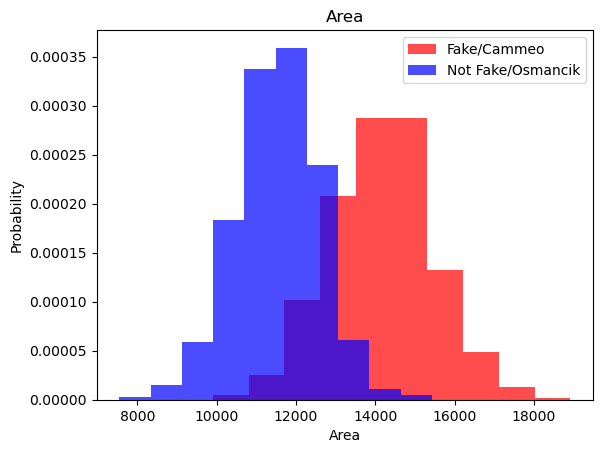

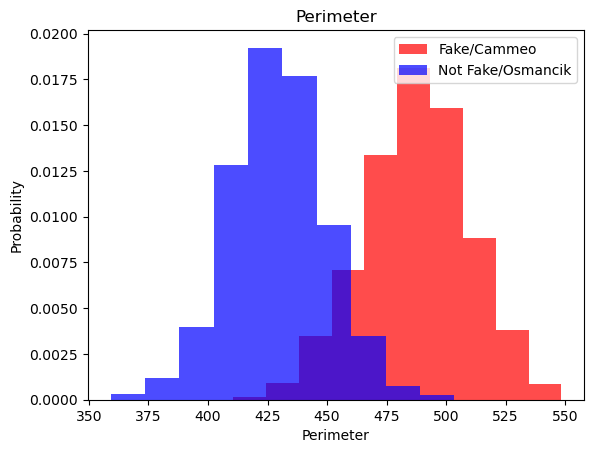

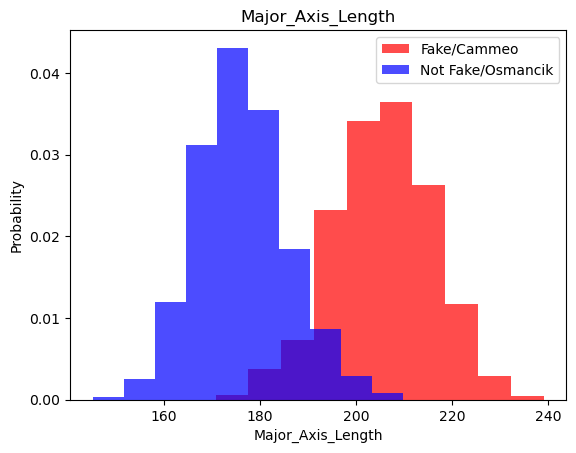

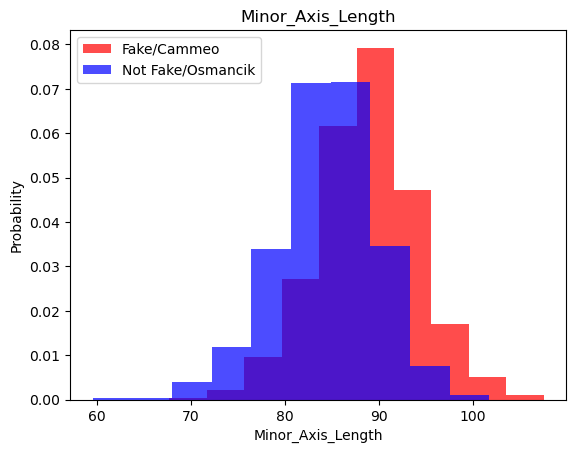

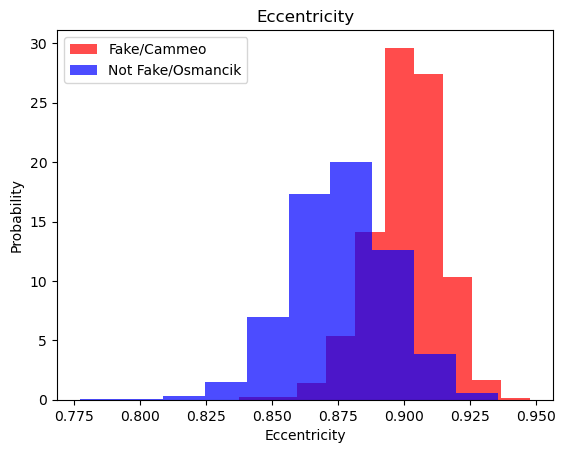

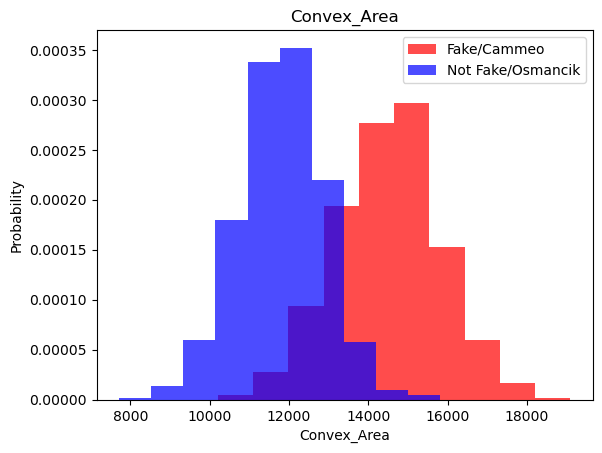

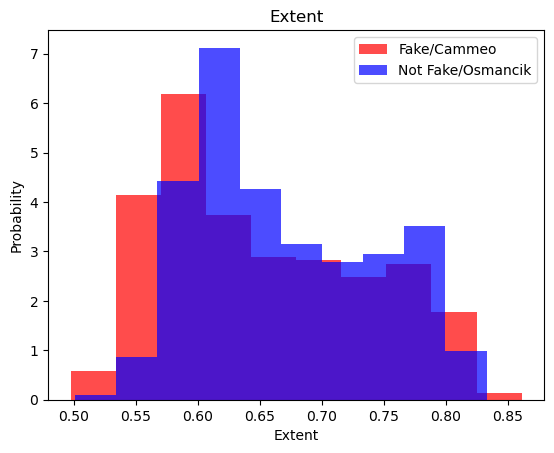

In [4]:
for label in Columns[:-1]:
  plt.hist(df[df["Class"]==1][label], color='red', label='Fake/Cammeo', alpha=0.7, density=True)
  plt.hist(df[df["Class"]==0][label], color='blue', label='Not Fake/Osmancik', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [5]:
trainingset,validset,testset = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])
# This rescales the data set so that their are an equal number of fake and real sets.
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler() # Scales the data
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [6]:
# We only want to rescale the training set
trainingset, X_train, y_train = scale_dataset(trainingset, oversample=True)
validset, X_valid, y_valid = scale_dataset(validset, oversample=False)
testset, X_test, y_test = scale_dataset(testset, oversample=False)

In [7]:
print(len(trainingset))
print(len(X_train))
print(len(y_train))

2644
2644
2644


In [8]:
#kNN ( k nearest neighbours )

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=7) # Checks the nearest neighbours to work out what it should be
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       420
           1       0.90      0.90      0.90       342

    accuracy                           0.91       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762



/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
#Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB 
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [14]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       420
           1       0.92      0.90      0.91       342

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



In [15]:
#Logistic regression.

In [16]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(

) # You can explore this  
#logisitc regression formula by adding stuff to the brackets
#Such as penalty which penalises the outliers more.
#E.g (penatly = l2) penalises outliers quadratically. 
lg_model = lg_model.fit(X_train,y_train)

In [17]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       420
           1       0.91      0.91      0.91       342

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



In [18]:
#SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC() # You can ad extra parameters.
svm_model = svm_model.fit(X_train,y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       420
           1       0.90      0.91      0.91       342

    accuracy                           0.92       762
   macro avg       0.91      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



In [21]:
#Neural Network

In [28]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING logs

# Import TensorFlow
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Ensure only critical errors are shown

# Verify TensorFlow installation
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.2


In [29]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [30]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [33]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING logs

# Import TensorFlow
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Ensure only critical errors are shown

# Verify TensorFlow installation
print("TensorFlow version:", tf.__version__)

least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

TensorFlow version: 2.16.2
16 nodes, dropout 0, lr 0.01, batch size 32


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 7)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 7), dtype=float32)
  • training=True
  • mask=None